In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
cities

['sao joao da barra',
 'bredasdorp',
 'beringovskiy',
 'maiduguri',
 'jamestown',
 'bengkulu',
 'puerto ayora',
 'bayan',
 'strezhevoy',
 'saint-philippe',
 'nuuk',
 'luau',
 'touros',
 'kruisfontein',
 'rikitea',
 'manyana',
 'kidero',
 'hamilton',
 'sawtell',
 'manakara',
 'griffith',
 'mar del plata',
 'tumannyy',
 'narsaq',
 'avarua',
 'saint-gilles',
 'busselton',
 'chuy',
 'mahebourg',
 'albany',
 'barrow',
 'vila franca do campo',
 'pisco',
 'cidreira',
 'poronaysk',
 'loubomo',
 'bethel',
 'atuona',
 'starodub',
 'victoria',
 'kupang',
 'weligama',
 'bluff',
 'hilo',
 'lasa',
 'ericeira',
 'malwan',
 'utiroa',
 'margate',
 'east london',
 'dikson',
 'sao miguel do araguaia',
 'ushuaia',
 'kokkola',
 'yellowknife',
 'ribeira grande',
 'punta arenas',
 'cape town',
 'hobart',
 'sharjah',
 'laguna',
 'ippy',
 'illoqqortoormiut',
 'kodiak',
 'faanui',
 'tasiilaq',
 'taolanaro',
 'kapaa',
 'chokurdakh',
 'vaini',
 'yulara',
 'serafimovich',
 'itaobim',
 'asau',
 'hermanus',
 'padang

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | maiduguri
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | bayan
Processing Record 9 of Set 1 | strezhevoy
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | nuuk
Processing Record 12 of Set 1 | luau
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | manyana
Processing Record 17 of Set 1 | kidero
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | sawtell
Processing Record 20 of Set 1 | manakara
Processing Record 21 of Set 1 | griffith
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set

Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | doka
Processing Record 45 of Set 4 | katihar
Processing Record 46 of Set 4 | cahors
Processing Record 47 of Set 4 | linchuan
City not found. Skipping...
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | san jose
Processing Record 50 of Set 4 | cibitoke
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | dandong
Processing Record 5 of Set 5 | miri
Processing Record 6 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 5 | celina
Processing Record 8 of Set 5 | maneadero
Processing Record 9 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 10 of Set 5 | blind river
Processing Record 11 of Set 5 | canarana
Processing Record 12 of Set 5 | porto walter
Processing Record 13 of Set 5 | umm durman
City not found. Skippi

Processing Record 26 of Set 8 | abu kamal
Processing Record 27 of Set 8 | yerbogachen
Processing Record 28 of Set 8 | kiunga
Processing Record 29 of Set 8 | matagami
Processing Record 30 of Set 8 | adre
Processing Record 31 of Set 8 | lodja
Processing Record 32 of Set 8 | calverton
Processing Record 33 of Set 8 | morden
Processing Record 34 of Set 8 | ceuasul-de campie
City not found. Skipping...
Processing Record 35 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 36 of Set 8 | ucluelet
Processing Record 37 of Set 8 | mersing
Processing Record 38 of Set 8 | wahiawa
Processing Record 39 of Set 8 | cam ranh
Processing Record 40 of Set 8 | melo
Processing Record 41 of Set 8 | florina
Processing Record 42 of Set 8 | rantepao
Processing Record 43 of Set 8 | shingu
Processing Record 44 of Set 8 | cherskiy
Processing Record 45 of Set 8 | goundam
Processing Record 46 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 47 of Set 8 | haradok
Processing Record 48 

Processing Record 11 of Set 12 | port augusta
Processing Record 12 of Set 12 | rexburg
Processing Record 13 of Set 12 | sabang
Processing Record 14 of Set 12 | clyde river
Processing Record 15 of Set 12 | tazovskiy
Processing Record 16 of Set 12 | evensk
Processing Record 17 of Set 12 | sept-iles
Processing Record 18 of Set 12 | atlantic city
Processing Record 19 of Set 12 | falun
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | ramshir
Processing Record 23 of Set 12 | auki
Processing Record 24 of Set 12 | pallasovka
Processing Record 25 of Set 12 | mocambique
City not found. Skipping...
Processing Record 26 of Set 12 | pedernales
Processing Record 27 of Set 12 | saint george
Processing Record 28 of Set 12 | kyzyl
Processing Record 29 of Set 12 | richards bay
Processing Record 30 of Set 12 | tarrega
Processing Record 31 of Set 12 | casma
Processing Record 32 of Set 12 | dalvik
Process

In [8]:
len(city_data)

557

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Joao Da Barra,-21.6403,-41.0511,82.49,70,12,15.97,BR,2021-09-19 17:20:39
1,Bredasdorp,-34.5322,20.0403,60.12,67,3,13.80,ZA,2021-09-19 17:20:27
2,Beringovskiy,63.0500,179.3167,40.10,88,99,7.58,RU,2021-09-19 17:20:39
3,Maiduguri,11.8464,13.1603,89.04,44,74,3.91,NG,2021-09-19 17:19:08
4,Jamestown,42.0970,-79.2353,73.02,53,1,4.00,US,2021-09-19 17:19:06
5,Bengkulu,-3.8004,102.2655,74.84,90,84,5.59,ID,2021-09-19 17:20:40
6,Puerto Ayora,-0.7393,-90.3518,78.76,93,85,8.99,EC,2021-09-19 17:20:40
7,Bayan,46.0833,127.4000,44.06,95,99,5.88,CN,2021-09-19 17:20:40
8,Strezhevoy,60.7333,77.5889,37.38,94,100,2.98,RU,2021-09-19 17:20:40
9,Saint-Philippe,-21.3585,55.7679,67.59,67,52,9.71,RE,2021-09-19 17:20:41


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Joao Da Barra,BR,2021-09-19 17:20:39,-21.6403,-41.0511,82.49,70,12,15.97
1,Bredasdorp,ZA,2021-09-19 17:20:27,-34.5322,20.0403,60.12,67,3,13.80
2,Beringovskiy,RU,2021-09-19 17:20:39,63.0500,179.3167,40.10,88,99,7.58
3,Maiduguri,NG,2021-09-19 17:19:08,11.8464,13.1603,89.04,44,74,3.91
4,Jamestown,US,2021-09-19 17:19:06,42.0970,-79.2353,73.02,53,1,4.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/19/21'

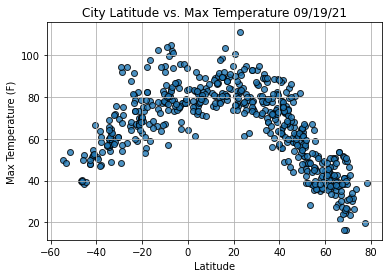

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()